# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another.

A few types of classification problems:


*   Binary classification
*   Mutliclass classification
*   Multilabel classification





#creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

#Make 1000 samples
sample = 1000;

#create circles
X,y=make_circles(sample,noise=0.03,random_state=42)

In [ ]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

##Let's Visualize our data

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Labels":y})
circles.head()

,X0,X1,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


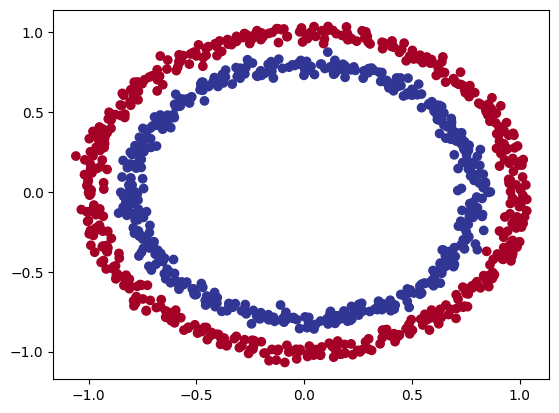

In [ ]:
#Visualize this data with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

##Input and Output Shapes

In [ ]:
#check the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#NO. of samples we are working with
len(X),len(y)

(1000, 1000)

In [ ]:
#view the examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

 ## Steps in Modelling
  * Desigh a Model
  * Compile Model
  * Fit a Model
  * Evaluate a Model

In [ ]:
import tensorflow as tf

#set a seed
tf.random.set_seed(42)

# Create a Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

#fit the model
model_1.fit(X,y,epochs=200,verbose=0)

#evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

**From above example we can say that the model is highly inaccurate because the accuracy is almost close to 50%**
**So we have to improve the accuracy of the model**

In [ ]:
#set a seed
tf.random.set_seed(40)

#split the data into test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

#fit the model
model_2.fit(X_train,y_train,epochs=100,verbose=0)

#evaluate the model
model_2.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.9867


[0.36817997694015503, 0.9866666793823242]

##Creating a function to view our model prediction

* Create a meshgrid of different X values.
* Make predictions across the meshgrid
* Plot prediction as well as line between zones

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundry(model,X,y):
  """PLots decision boundry created by model predicting on X_test"""

  #define the axis boundries of the plot
  x_min,x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

  #create a meshgrid
  xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

  #Create X value (we're going to make prediction on)
  x_test = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_test)

  # Check for Multi-Class
  if len(y_pred[0])>1:
    print("Doing Multiclass Classifications")
    #we have to reshape our predictions to make them plotting ready
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundry
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

# def plot_decision_boundary(model, X, y):
#   """
#   Plots the decision boundary created by a model predicting on X.
#   This function was inspired by two resources:
#    1. https://cs231n.github.io/neural-networks-case-study/
#    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
#   """
#   # Define the axis boundaries of the plot and create a meshgrid
#   x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#   y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#   xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))

#   # Create X value (we're going to make predictions on these)
#   x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

#   # Make predictions
#   y_pred = model.predict(x_in)

#   # Check for multi-class
#   if len(y_pred[0]) > 1:
#     print("doing multiclass classification")
#     # We have to reshape our prediction to get them ready for plotting
#     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#   else:
#     print("doing binary classification")
#     y_pred = np.round(y_pred).reshape(xx.shape)

#   # Plot the decision boundary
#   plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#   plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


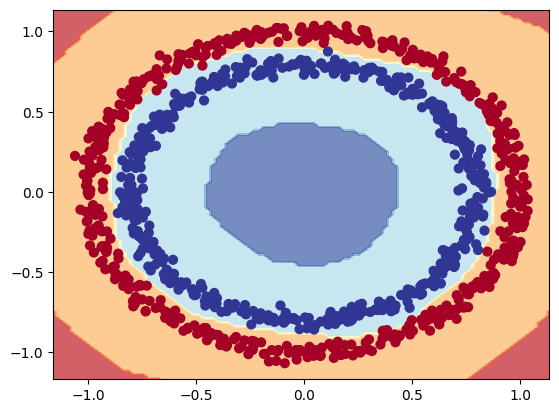

In [ ]:
plot_decision_boundry(model=model_2,X=X,y=y)

**The missing piece: Non-linearity**
To solve that problem now we are using sigmoid(non-linear) activation function

In [ ]:
#set a seed
tf.random.set_seed(40)

#split the data into test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#fit the model
model_3.fit(X_train,y_train,epochs=100,verbose=0)

#evaluate the model
model_3.evaluate(X_test,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 1.0000


[0.22275787591934204, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


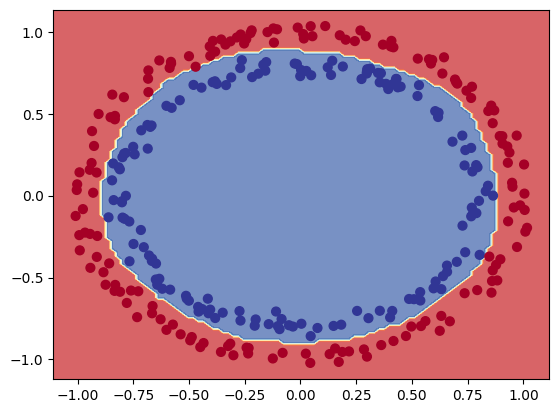

In [ ]:
plot_decision_boundry(model=model_3,X=X_test,y=y_test)

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

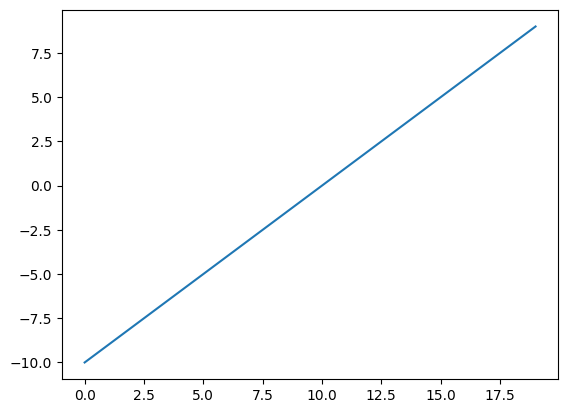

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

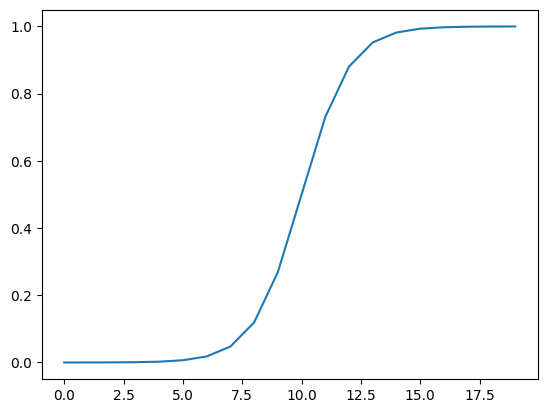

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

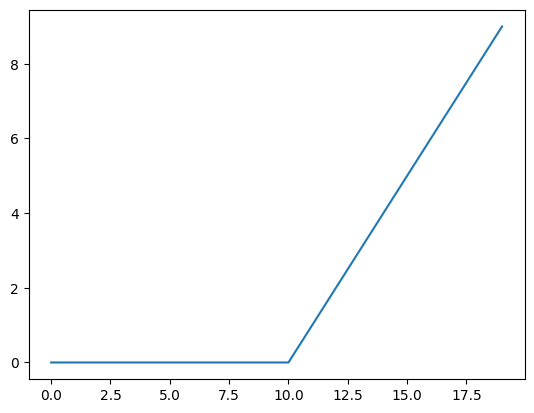

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

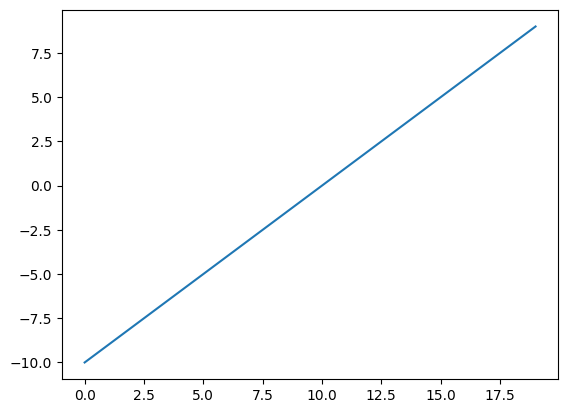

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classificiation model

* till now we have tested and trained the model on the same data
* so now we'll split the data into two parts test and train with a specific ratio of 80 to 20


In [ ]:
#split the data into test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#set seed
tf.random.set_seed(42)

#create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

#fit the model
history=model_4.fit(X_train,y_train,epochs=200,verbose=0)

#evaluate the model
model_4.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0014468260342255235, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


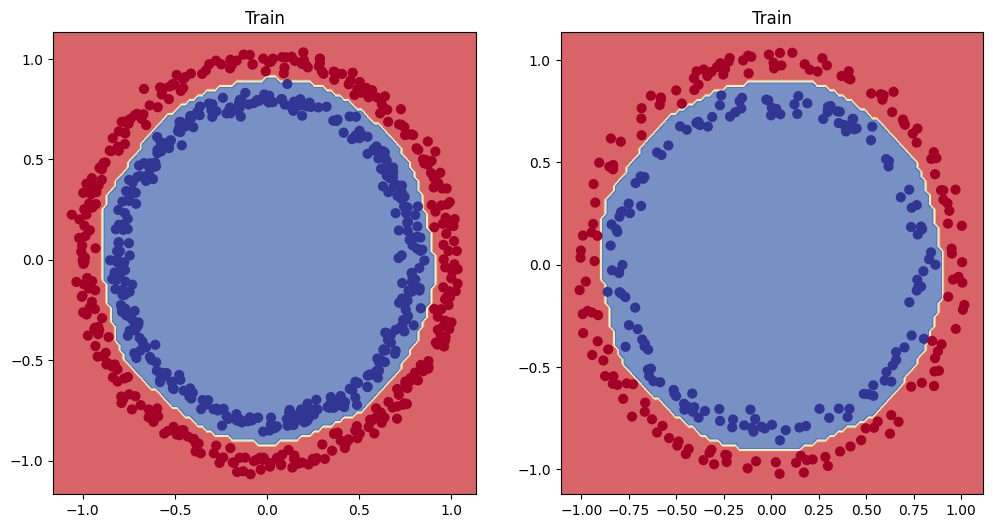

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundry(model_4,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundry(model_4,X_test,y_test)

 ## plot the loss curve

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689097,0.531429
1,0.617085,0.700000
2,0.389014,0.900000
3,0.146788,0.977143
4,0.057729,0.990000
...,...,...
195,0.000335,1.000000
196,0.000313,1.000000
197,0.000334,1.000000
198,0.000303,1.000000


Text(0.5, 1.0, 'Model_4 loss Curve')

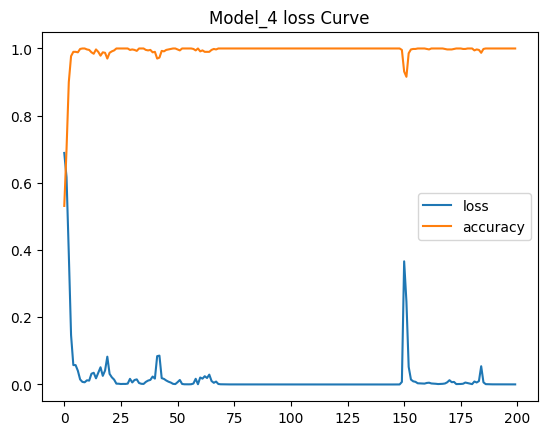

In [ ]:
#plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_4 loss Curve")

##Finding the best learning rate

To find the best learning rate we'll Use
* Learning rate **Callback**
* Another model
* Modifies Loss curve plot

In [ ]:
#Set random Seed
tf.random.set_seed(42)

#build the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

#compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

#create a learning rate callback
lr_Scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model(pass the lr_scheduler to fit )
history_model_5 = model_5.fit(X_train,y_train,epochs=100,verbose=0,callbacks=[lr_Scheduler])

#evaluate the model
model_5.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8484 - accuracy: 0.4800


[0.8483905792236328, 0.47999998927116394]

<Axes: xlabel='epochs'>

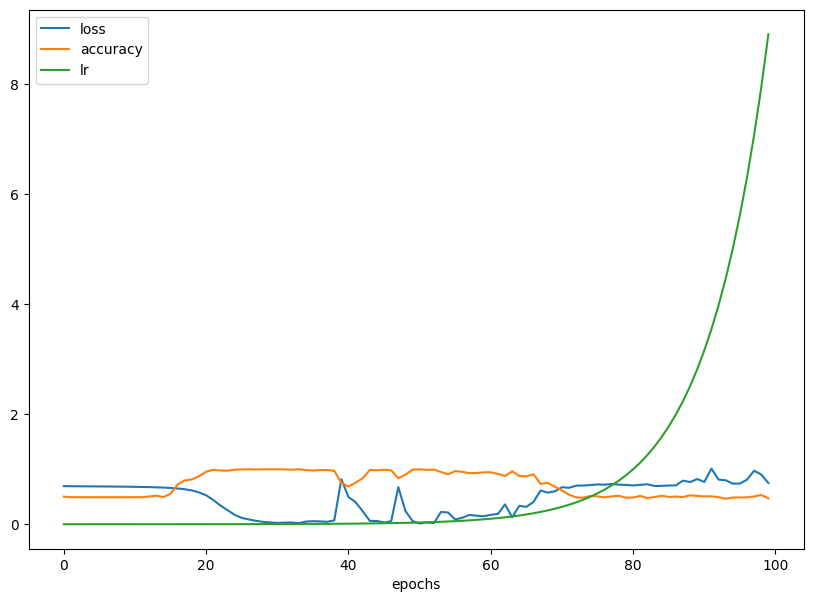

In [ ]:
#checkout the history
pd.DataFrame(history_model_5.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Loss v/s Learning rate')

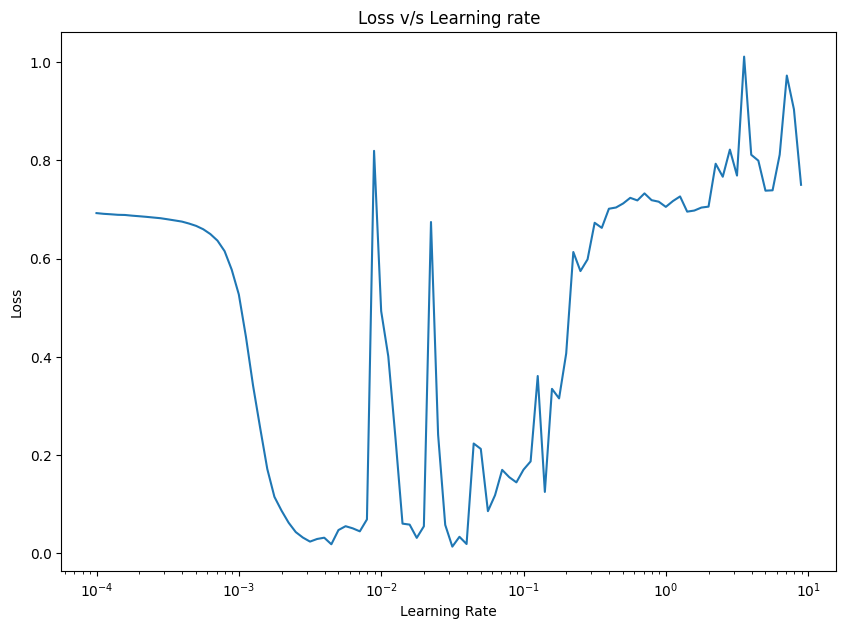

In [ ]:
#plot learning rate v/s loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_model_5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss v/s Learning rate")

**so by looking at the graph we can decide the best learning rate for this model is at 0.01**

##More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
#check the accuracy of the model
loss,accuracy = model_4.evaluate(X_test,y_test)
print(f"Model loss on the test set is {loss}")
print(f"Model accuracy on the test set is {(accuracy*100):.2f}%")

10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Model loss on the test set is 0.0014468260342255235
Model accuracy on the test set is 100.00%


#Confusion Matrix

In [ ]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix

#make predictions
y_pred = model_4.predict(X_test)

#create a confusion matrix
confusion_matrix(y_test,y_pred)

10/10 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test.shape,y_pred.shape
#from here we can see that the shapes of the test and predictions are not same so inorder to  create a confusion matrix we have to make both of these of same shapes

((300,), (300, 1))

Oops... looks like our predictions array has come out in prediction probability form... the standard output from the sigmoid (or softmax) activation functions. and the standard input is either 0 or 1

In [ ]:
y_pred[:10],y_test[:10]

(array([[9.9998546e-01],
        [2.1026404e-04],
        [9.9999523e-01],
        [1.6153588e-07],
        [9.9905151e-01],
        [9.9751520e-01],
        [5.9545209e-07],
        [2.2376012e-08],
        [9.9997795e-01],
        [2.9000628e-05]], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

In [ ]:
#convert the predivction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_pred))

array([[156,   0],
       [  0, 144]])

Beautify the confusion matrix

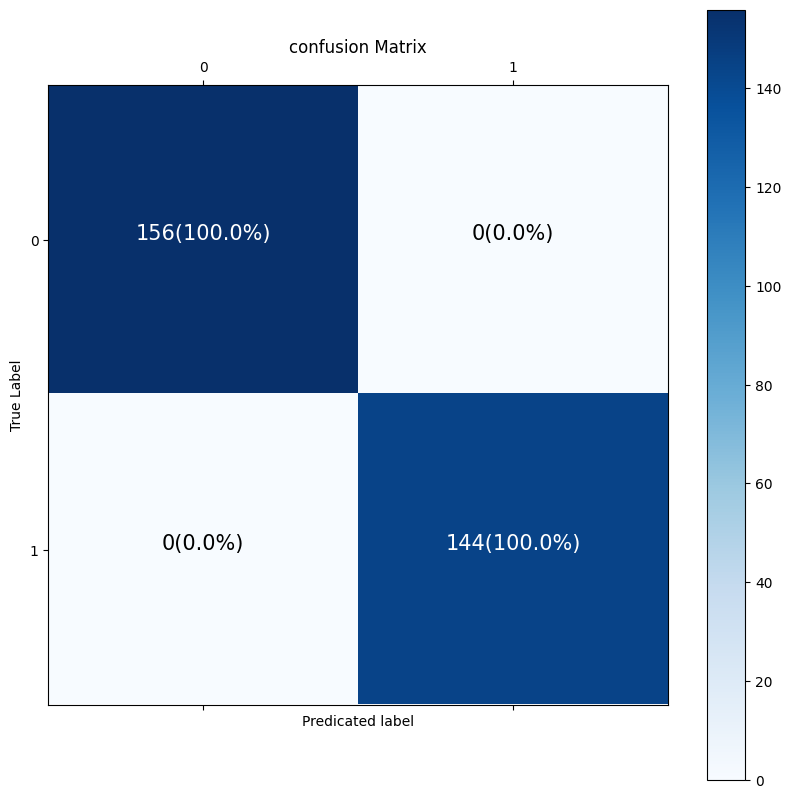

In [ ]:
#Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix

import itertools

figsize = (10,10)

#create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

#let's beautify it
fig,ax=plt.subplots(figsize=figsize)
#Crate a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

#Label the axis
ax.set(title="confusion Matrix",xlabel="Predicated label",ylabel="True Label",
       xticks=np.arange(n_classes),yticks=np.arange(n_classes),
       xticklabels=labels,yticklabels=labels)

#set the thresold
thresold = (cm.max()+cm.min())/2.

#plot some text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]}({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > thresold else "black",
           size=15)


##Multi-Class Classification

When you have more than two classes as an option, it's known as multi-class classification
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

#Preparing the Data

In [ ]:
#import the required libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and testing sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [ ]:
#show the first training example
print(f"Training Sample is: \n {train_data[0]}")
print(f"Training label is: \n {train_labels[0]}")

Training Sample is: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

In [ ]:
#check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

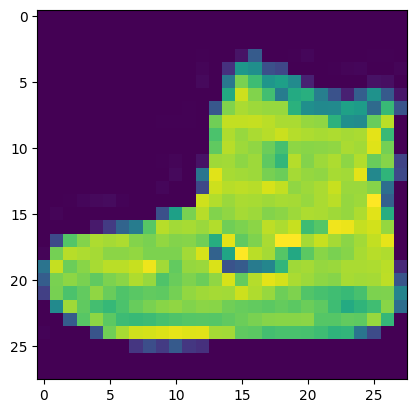

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]) # inshow is used to print the image of the dataset

In [ ]:
#sample label
train_labels[0]

9

In [ ]:
#creating the small list so we can index onto our training data so they are human readable
class_names = ["T-Shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-Shirt/Top')

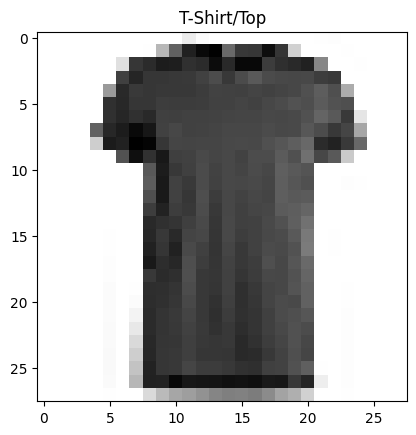

In [ ]:
#plot example image and it's label
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

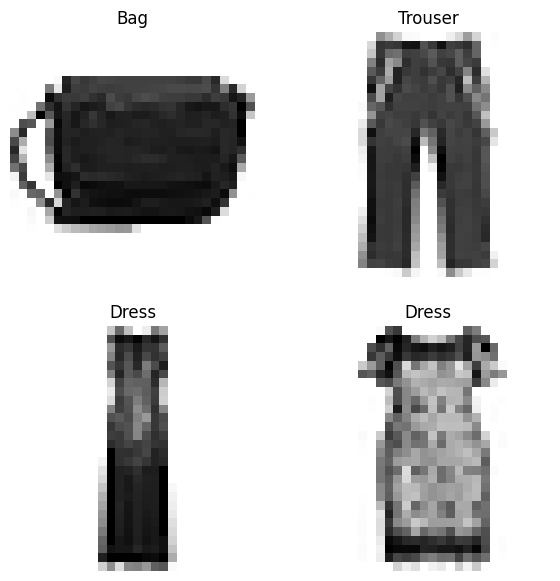

In [ ]:
#plot random image of fashion mnist
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##build a multiclass classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
*If your labels are one-hot encoded, use CategoricalCrossentropy()
* If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
#set random seed
tf.random.set_seed(42)

#build the model
model_Fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #it is used to convert the shape of the data from 28*28 to 784*none
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="Softmax") # here 10 is used because ibjects are of 10 classes
])

#compile the model
model_Fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #because the labels in the form of integer so instead of using Categoricalcrossentropy we have used the sparsecategoricalcrossentropy
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#fit the model
training_history_1 = model_Fashion.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3717 - accuracy: 0.0997 - val_loss: 2.2996 - val_accuracy: 0.1019
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1185 - accuracy: 0.1661 - val_loss: 1.8420 - val_accuracy: 0.2071
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7643 - accuracy: 0.2478 - val_loss: 1.7015 - val_accuracy: 0.2894
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6555 - accuracy: 0.2992 - val_loss: 1.6473 - val_accuracy: 0.2996
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5928 - accuracy: 0.3284 - val_loss: 1.5900 - val_accuracy: 0.3357
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5422 - accuracy: 0.3480 - val_loss: 1.5329 - val_accuracy: 0.3470
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5202 - accuracy: 0.3586 - val_loss: 1.4695 - val_accuracy:

In [ ]:
model_Fashion.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


so in order to produce the more accurate results we have to normalize the data we are giving to the model
neural network prefer data to be scaled between 0 to 1


In [ ]:
train_data.min(),train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
#now we'll put this data into the model and again we'll validate it with the validation data

In [ ]:
#set random seed
tf.random.set_seed(42)

#build the model
model_Fashion_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #it is used to convert the shape of the data from 28*28 to none * 28
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax") # here 10 is used because ibjects are of 10 classes
])

#compile the model
model_Fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #because the labels in the form of integer so instead of using Categoricalcrossentropy we have used the sparsecategoricalcrossentropy
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#fit the model
training_history_2 = model_Fashion_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2919 - accuracy: 0.4890 - val_loss: 0.9243 - val_accuracy: 0.6280
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8196 - accuracy: 0.6941 - val_loss: 0.7677 - val_accuracy: 0.7209
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7001 - accuracy: 0.7485 - val_loss: 0.6879 - val_accuracy: 0.7648
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6577 - accuracy: 0.7638 - val_loss: 0.6795 - val_accuracy: 0.7685
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6370 - accuracy: 0.7710 - val_loss: 0.6454 - val_accuracy: 0.7718
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6196 - accuracy: 0.7778 - val_loss: 0.6439 - val_accuracy: 0.7746
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6030 - accuracy: 0.7826 - val_loss: 0.6183 - val_accuracy:

**Neural Networks tend to prefer data in numerical form as well as scaled/normalized(0-1) form**

<Axes: title={'center': 'Normalized-data'}, xlabel='epochs'>

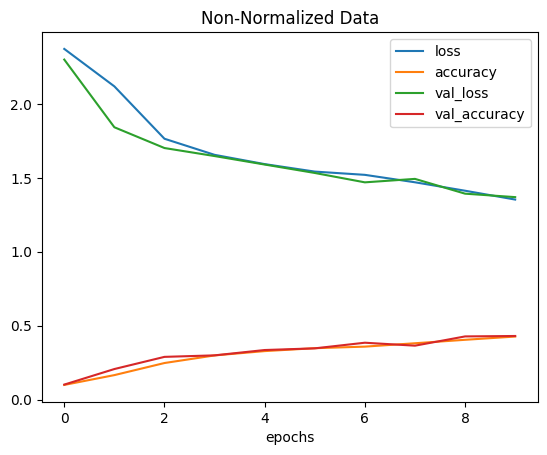

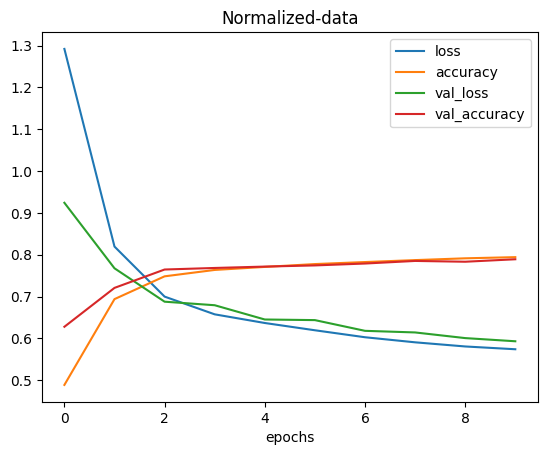

In [ ]:
pd.DataFrame(training_history_1.history).plot(xlabel="epochs",title="Non-Normalized Data")
pd.DataFrame(training_history_2.history).plot(xlabel="epochs",title="Normalized-data")

🔑 Note: The same model with even slightly different data can produce dramatically different reuslts. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

##Finding the ideal learning rate

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create the model
fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#create a learning rate callback
lr_Scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#compile the model
fashion_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

#fit the model
fashion_model_3_history = fashion_model_3.fit(train_data_norm,train_labels,
                                              epochs=40,
                                              validation_data=(test_data_norm,test_labels),
                                              callbacks=[lr_Scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4920 - accuracy: 0.8239 - val_loss: 0.4101 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3689 - accuracy: 0.8639 - val_loss: 0.4584 - val_accuracy: 0.8491 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3417 - accuracy: 0.8744 - val_loss: 0.4106 - val_accuracy: 0.8471 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3218 - accuracy: 0.8815 - val_loss: 0.3833 - val_accuracy: 0.8619 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3092 - accuracy: 0.8845 - val_loss: 0.3847 - val_accuracy: 0.8604 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3013 - accuracy: 0.8874 - val_loss: 0.3741 - val_accuracy: 0.8634 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0, 0.5, 'Loss')

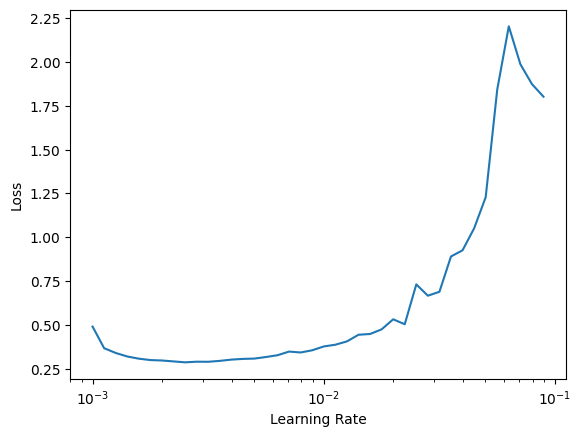

In [ ]:
#plot rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,fashion_model_3_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
#let's refit the model with the ideal learning rate

#set the random seed
tf.random.set_seed(42)

#create the model
fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
fashion_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.005),
    metrics=["accuracy"]
)

#fit the model
fashion_model_3_history = fashion_model_3.fit(train_data_norm,train_labels,
                                              epochs=40,
                                              validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5007 - accuracy: 0.8190 - val_loss: 0.4410 - val_accuracy: 0.8411
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4018 - accuracy: 0.8534 - val_loss: 0.4554 - val_accuracy: 0.8419
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8644 - val_loss: 0.4899 - val_accuracy: 0.8179
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3534 - accuracy: 0.8709 - val_loss: 0.4365 - val_accuracy: 0.8458
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.8742 - val_loss: 0.3832 - val_accuracy: 0.8614
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8762 - val_loss: 0.4199 - val_accuracy: 0.8448
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3255 - accuracy: 0.8791 - val_loss: 0.4252 - val_accuracy:

##Evaluating our multi-class classification model
To evlauate our multi-class classification model we could:
* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
* Save and export it for use in an application



In [ ]:
#Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix

import itertools

figsize = (10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  #create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  #let's beautify it
  fig,ax=plt.subplots(figsize=figsize)
  #Crate a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axis
  ax.set(title="confusion Matrix",xlabel="Predicted label",ylabel="True Label",
        xticks=np.arange(n_classes),yticks=np.arange(n_classes),
        xticklabels=labels,yticklabels=labels)

  #set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  #set the thresold for different colours
  thresold = (cm.max()+cm.min())/2.

  #plot some text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > thresold else "black",
            size=text_size)



In [ ]:
class_names

['T-Shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
#make some predictions
y_prob = fashion_model_3.predict(test_data_norm)

y_pred = y_prob.argmax(axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

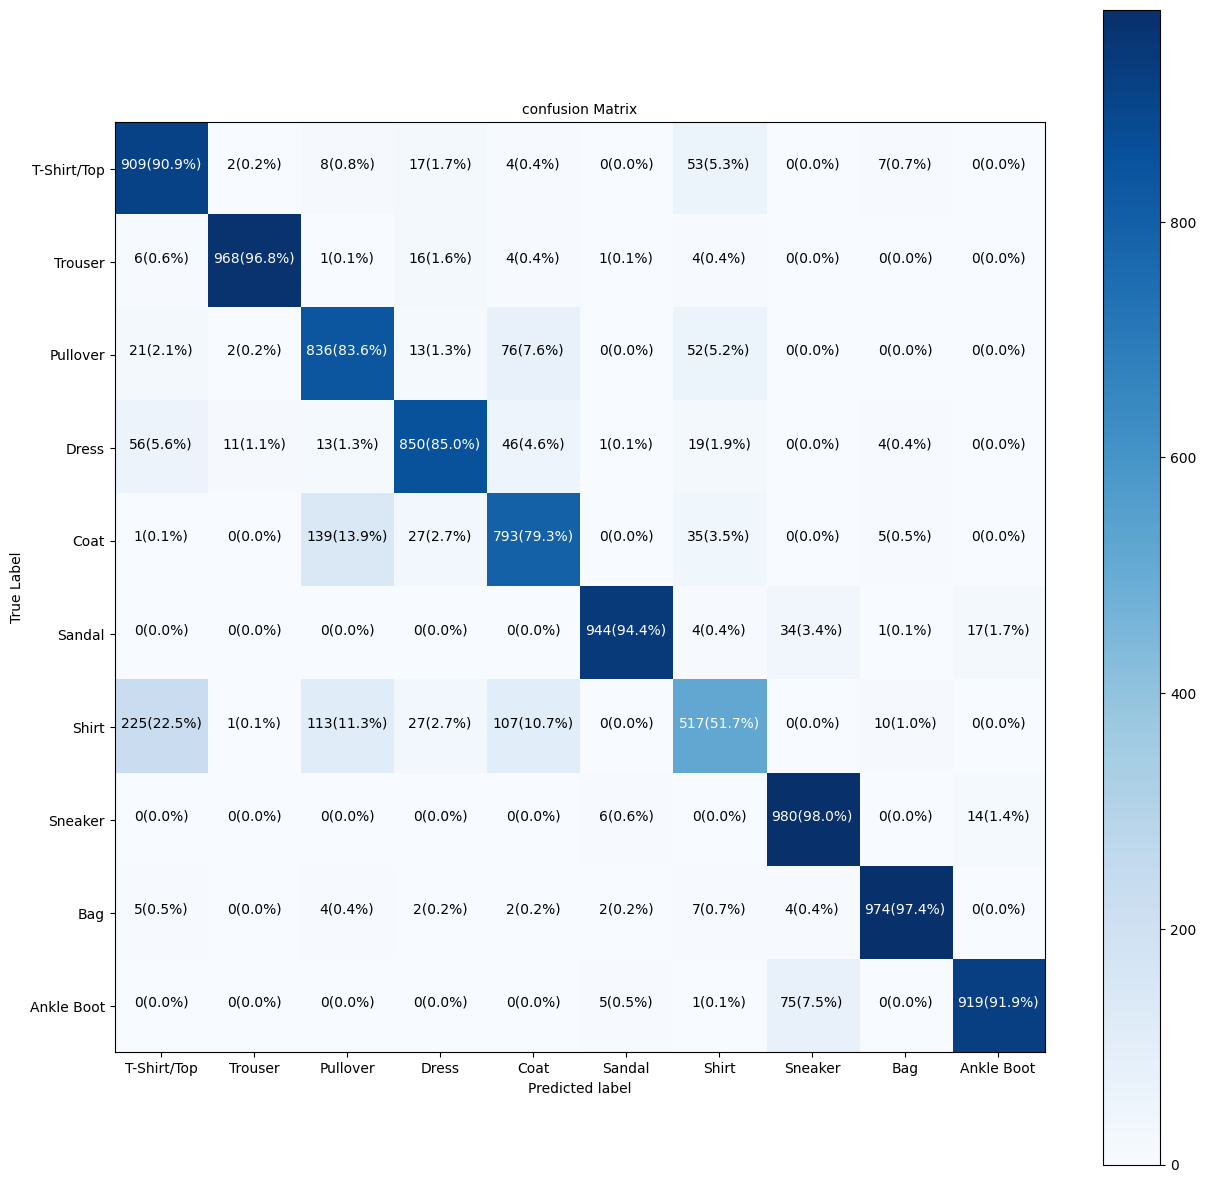

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 18ms/step


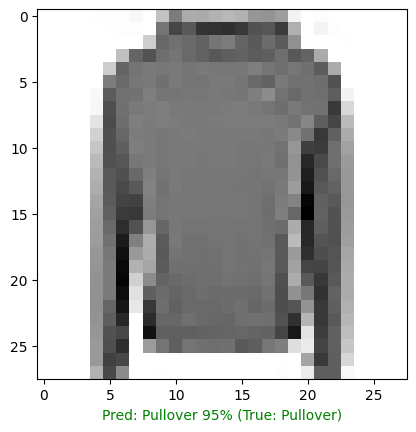

In [ ]:

# Check out a random image as well as its prediction
plot_random_image(model=fashion_model_3,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)